In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.utils.multiclass import unique_labels
import pickle
%matplotlib inline

In [2]:
def plotCM(y_true, y_pred, name = "Confusion Matrix"):
    labels = unique_labels(y_test)
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = labels, index = labels)
    sn.heatmap(table, annot = True, fmt = 'd', cmap = 'viridis')
    plt.gcf().axes[0].tick_params(colors = 'black')
    plt.gcf().axes[1].tick_params(colors = 'black')
    plt.title(name, color = 'black')
    plt.xlabel('Predicted Label', color = 'black')
    plt.ylabel('True Label', color = 'black')
    plt.gcf().set_size_inches(10,6)
    plt.show()

In [3]:
df_train = pd.read_csv("train dataset.csv")
df_test = pd.read_csv("test dataset.csv")

In [4]:
df_train.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [5]:
df_test.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible


In [6]:
df_train.loc[449,'Gender'] = 'Male'

In [7]:
g_train = pd.get_dummies(df_train['Gender']).drop('Female', axis = 1)
g_test = pd.get_dummies(df_test['Gender']).drop('Female', axis = 1)
X = pd.concat([g_train, df_train.drop('Gender', axis = 1)], axis = 1)
y = pd.concat([g_test, df_test.drop('Gender', axis = 1)], axis = 1)

In [8]:
X.head()

,Male,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,1,17,7,4,7,3,2,extraverted
1,1,19,4,5,4,6,6,serious
2,0,18,7,6,4,5,5,dependable
3,0,22,5,6,7,4,3,extraverted
4,0,19,7,4,6,5,4,lively


In [9]:
y.head()

,Male,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,0,20,7,9,9,5,5,dependable
1,1,17,5,4,5,2,4,serious
2,0,25,5,5,7,2,4,serious
3,0,18,6,2,7,4,7,serious
4,0,19,2,4,7,1,3,responsible


In [10]:
X.dropna(inplace = True)
y.dropna(inplace = True)

In [11]:
X.to_csv('X.csv')
y.to_csv('y.csv')

In [12]:
X_train = X.drop('Personality (Class label)', axis = 1)
y_train = X['Personality (Class label)']
X_test = y.drop('Personality (class label)', axis = 1)
y_test = y['Personality (class label)']

In [13]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
knn = KNN()
svc = SVC()
xgb = XGBClassifier()

In [14]:
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

  dependable       0.67      0.29      0.40        21
 extraverted       0.81      0.91      0.86        77
      lively       0.89      0.71      0.79        24
 responsible       0.96      0.65      0.78        40
     serious       0.83      0.95      0.89       153

    accuracy                           0.84       315
   macro avg       0.83      0.70      0.74       315
weighted avg       0.84      0.84      0.83       315



In [15]:
knn.fit(X_train, y_train)
knn_pred= knn.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

  dependable       0.05      0.19      0.08        21
 extraverted       0.31      0.32      0.32        77
      lively       0.12      0.25      0.16        24
 responsible       0.17      0.17      0.17        40
     serious       0.40      0.18      0.25       153

    accuracy                           0.22       315
   macro avg       0.21      0.22      0.20       315
weighted avg       0.31      0.22      0.24       315



In [16]:
svc.fit(X_train, y_train)
svc_pred= svc.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

  dependable       0.00      0.00      0.00        21
 extraverted       0.67      0.08      0.14        77
      lively       0.00      0.00      0.00        24
 responsible       0.00      0.00      0.00        40
     serious       0.50      1.00      0.67       153

    accuracy                           0.50       315
   macro avg       0.23      0.22      0.16       315
weighted avg       0.41      0.50      0.36       315



C:\Users\suraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [17]:
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, xgb_pred))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got ['dependable' 'extraverted' 'lively' 'responsible' 'serious']

In [19]:
algos = ['Logistic Regression', 'KNN', 'SVC']
f1_scores = [f1_score(y_test, lr_pred, average='weighted'), f1_score(y_test, knn_pred, average='weighted'), f1_score(y_test, svc_pred, average='weighted')]

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (4).

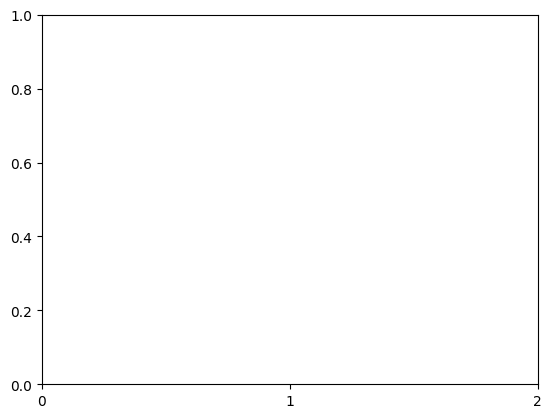

In [21]:
ypos = np.array([0,1,2])
plt.xticks(ypos, algos)
plt.bar(ypos, f1_scores)
plt.gcf().axes[0].tick_params(colors = 'black')
plt.title('F1 Scores vs Algos', color = 'black')
plt.xlabel('Algorithms', color = 'black')
plt.ylabel('F1 Scores', color = 'black')
plt.gcf().set_size_inches(10,6)
plt.show()

In [ ]:
# with open('personality_prediction_lr', 'wb') as f:
#     pickle.dump(lr, f)